<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Classification</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 3: Classification\
Last Updated: April 9, 2021\
Forked by: Shafa Salsabila Kurniawan

<h1>Bank Marketing Introduction</h1>

The objective of this project is to predict whether the customer will subscribe to a term deposit (target). The dataset used for this project is downloaded from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing (the original source is written at the end of this section). For an overview, this dataset is made up of 4 CSV files. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Attribute Information:

Input variables:

bank client data:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

1. contact: contact communication type (categorical: 'cellular','telephone')
2. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
4. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

1. emp.var.rate: employment variation rate - quarterly indicator (numeric)
2. cons.price.idx: consumer price index - monthly indicator (numeric)
3. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
4. euribor3m: euribor 3 month rate - daily indicator (numeric)
5. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

1. y - has the client subscribed a term deposit? (binary: 'yes','no')

Original Source:
- [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Data Preparation

Load the library and dataset you need.

In [1]:
# Importing libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset and make pandas detect the separator for the data
df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep=';')

# View the top 5 rows from dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# View the bottom 5 rows from dataset
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Let's check the dimension of the dataset using `.shape()` and view the basic information of the dataset using `.info()`.

In [4]:
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 no

**Insight**

- There's 10 numerical data and 11 categorical data in the dataset
- `Age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, and `nr.employed` are numerical data.
- `Job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome`, and `y` are categorical data.
- So far, no null data has been detected.

Let's check how many null is found in the data using `.isnull()` and `.sum()` function.

In [5]:
print(df.isnull().sum(), "\n")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 



## Exploratory Data Analysis

Let's begin by viewing the descriptive statistics of the data using `.describe()` function.

In [6]:
# Viewing simple descriptive statistics from the data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Insight**

- Target `age` range from 17 to 98 y.o.
- Some data (e.g `duration`, `campaign`, etc) is suspected to have outliers
- `Duration`, `pdays`, and `previous` has 0 value as the minimum
- Some variables have negative value (e.g. `emp.var.rate` and `cons.conf.idx`)

In order to understand the distribution of features in the dataset, explore the numerical features and categorical features separately.

### Explore Numerical Features

For the beginning, let's get into the numerical features first.

In [7]:
# Storing all the numerical features into one variable
numerical = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index

# Calling the numerical-only dataset
numerical

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration',
       'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

To get a better understanding on target customer, visualize the dataset using boxplot (to map the range and distribution of features divided into their preference to subscribe) and distplot (to see the distribution of the features) to see if some features show tendency that may affect their decision whether to subscribe or not.

age


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


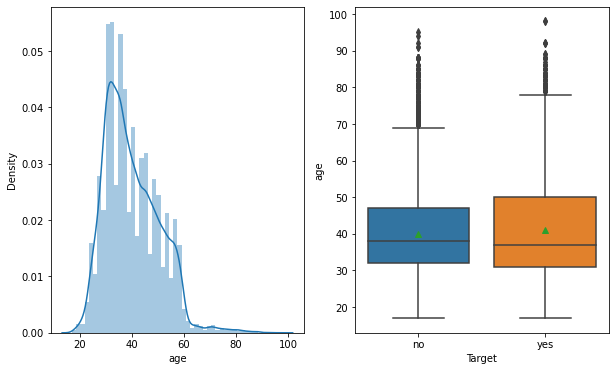

campaign


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


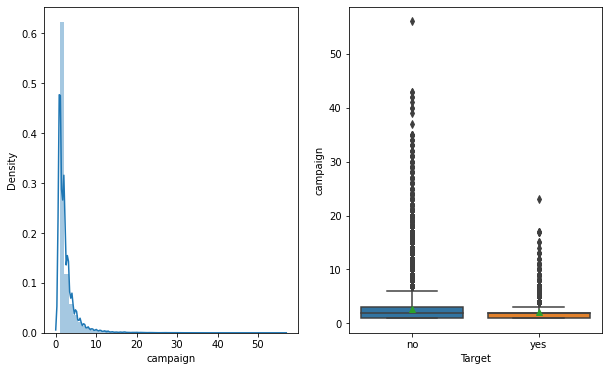

cons.conf.idx


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


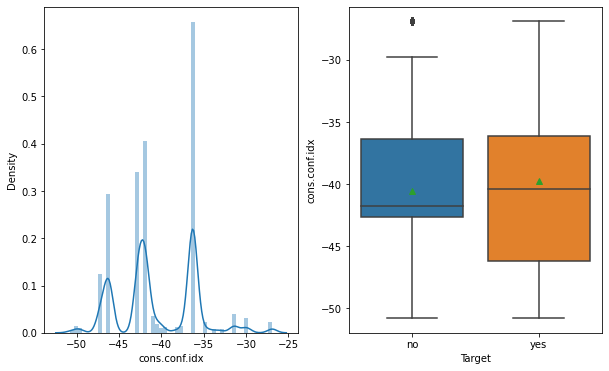

cons.price.idx


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


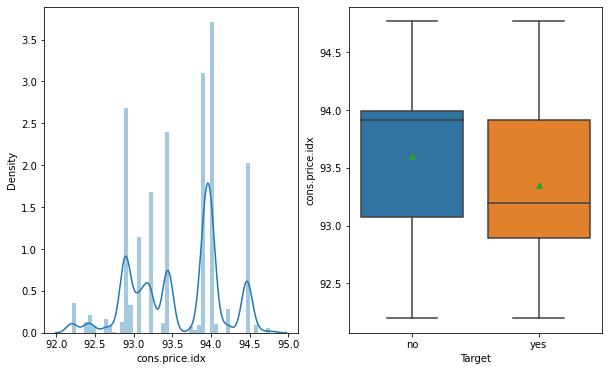

duration


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


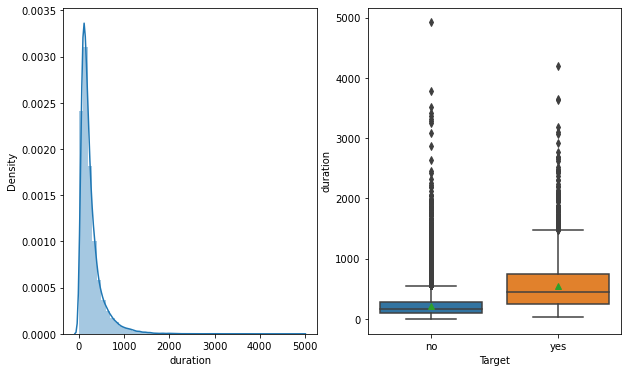

emp.var.rate


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


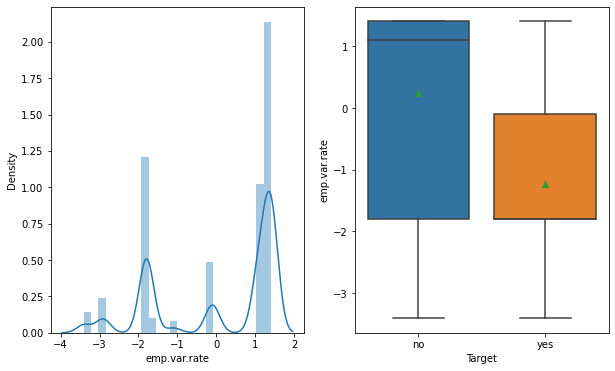

euribor3m


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


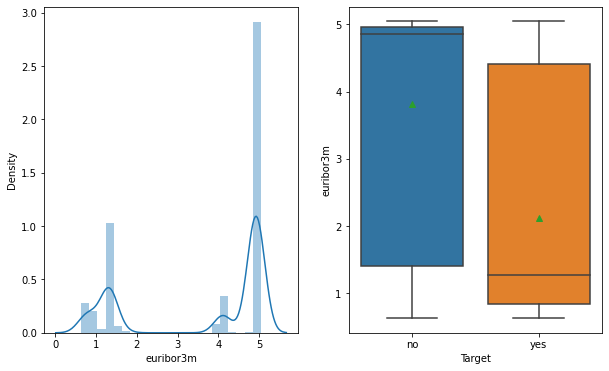

nr.employed


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


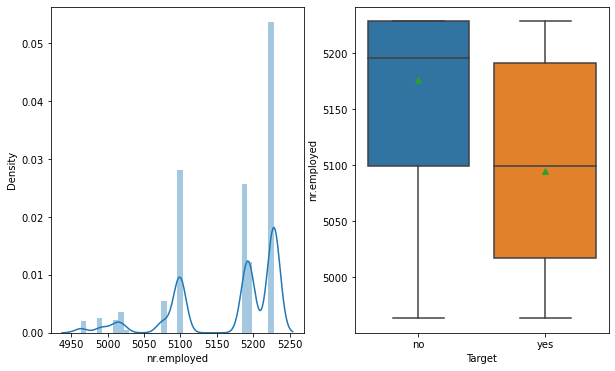

pdays


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


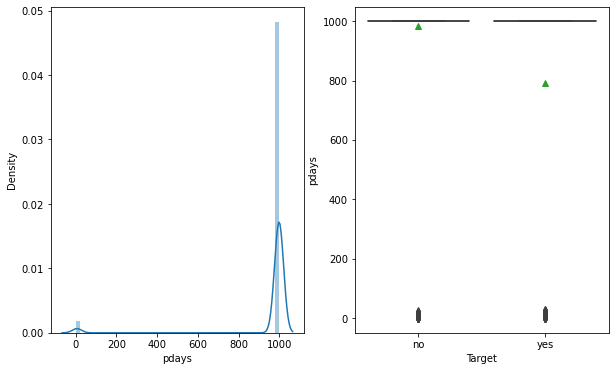

previous


C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


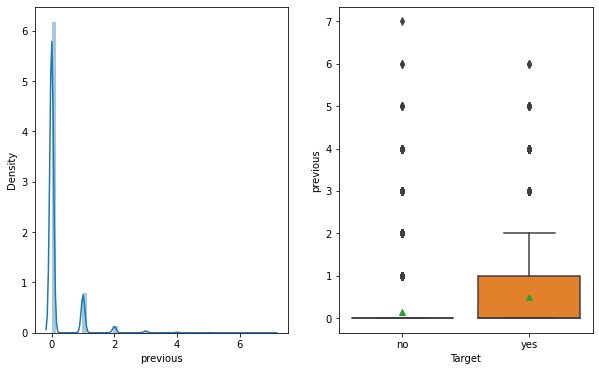

In [8]:
# Create a for loop to iterate the visualization process for every numerical features
for cols in numerical:
    print(cols)
    plt.figure(figsize=(10,6))
    
    # Let's try plotting density to each numerical features
    plt.subplot(1, 2, 1)
    sns.distplot(df[cols]) # visualize through distplot
    plt.xlabel(cols) # set x-label
    plt.ylabel('Density') # set y-label
    
    # Let's try plotting target to each numerical features
    plt.subplot(1, 2, 2)
    sns.boxplot(x='y', y=cols, data=df, showmeans=True) # visualize through boxplot
    plt.xlabel('Target') # set x-label
    plt.ylabel(cols) # set y-label
    
    plt.show()

**Insights**

- Age range of the customer is quite diverse (17-98), but mostly are in their 20-40's.

### Explore Categorical Features

After exploring the numerical dataset, let's get onto this one too.

In [9]:
# Storing all the categorical data into one variable
categorical = df.dtypes[df.dtypes == 'object'].index

# Calling to check if the dataset has filtered all the categorical data into one dataframe
categorical

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [10]:
# Let's check what options are available in each features
for i in range(0, len(categorical)):
    print(categorical[i])
    print(df[categorical[i]].unique(), '\n')

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital
['married' 'single' 'divorced' 'unknown'] 

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default
['no' 'unknown' 'yes'] 

housing
['no' 'yes' 'unknown'] 

loan
['no' 'yes' 'unknown'] 

contact
['telephone' 'cellular'] 

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome
['nonexistent' 'failure' 'success'] 

y
['no' 'yes'] 



After knowing the diversity of the inputs, let's visualize using countplot to see the distribution of every input in each categorical features.

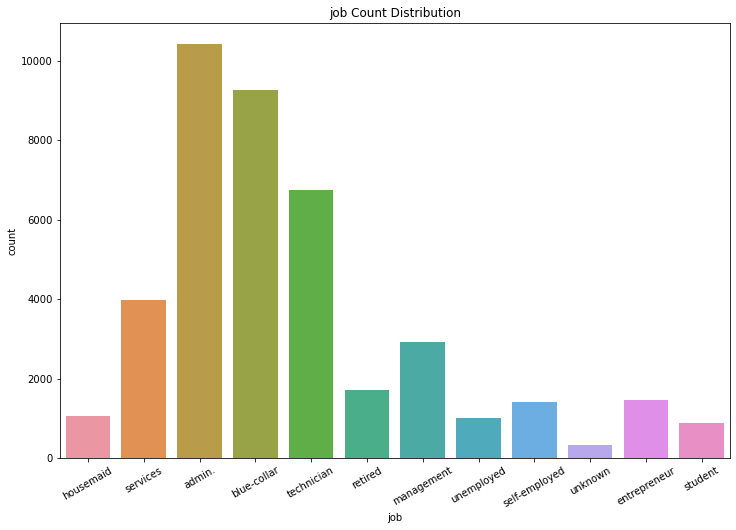

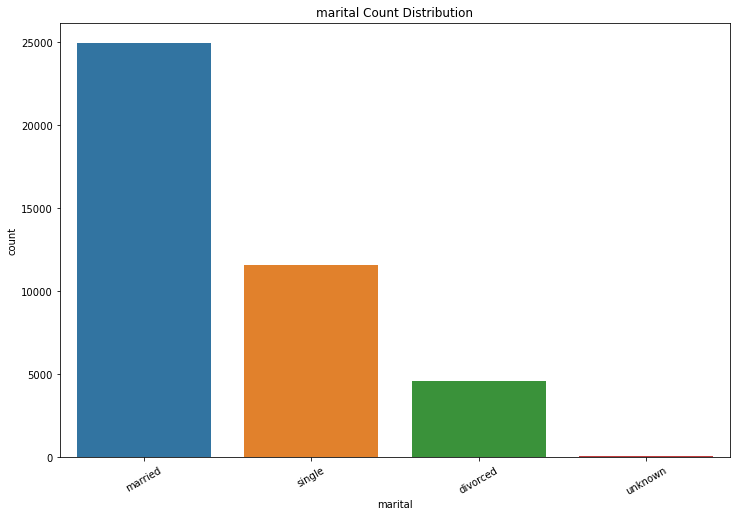

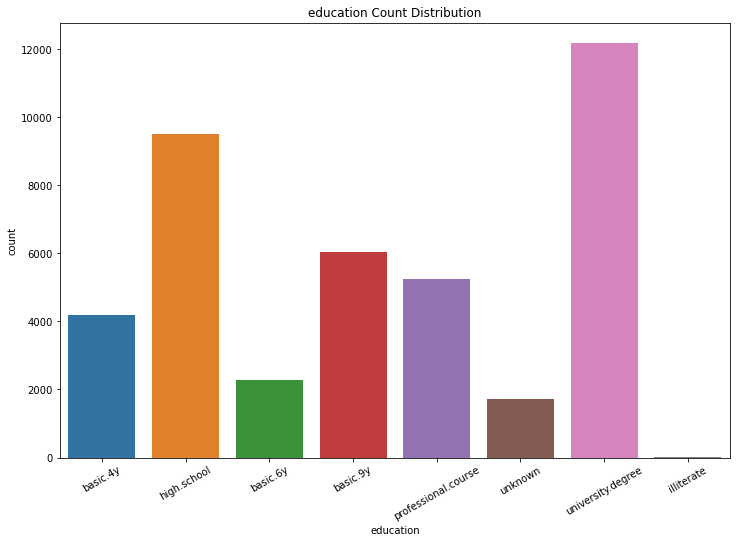

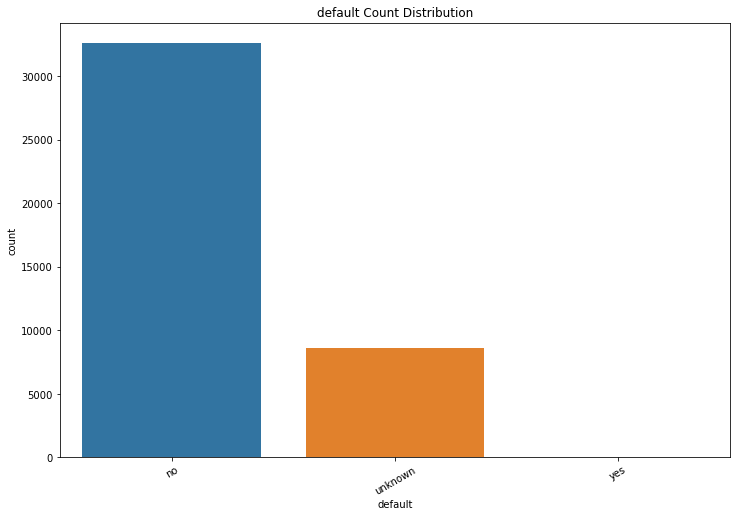

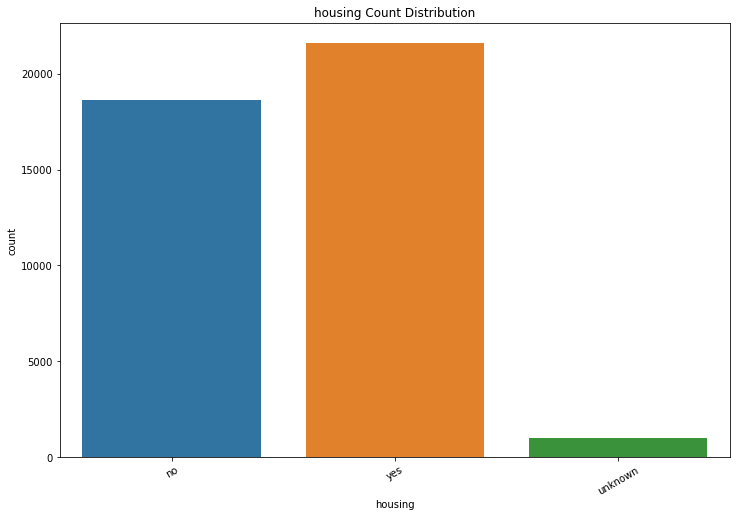

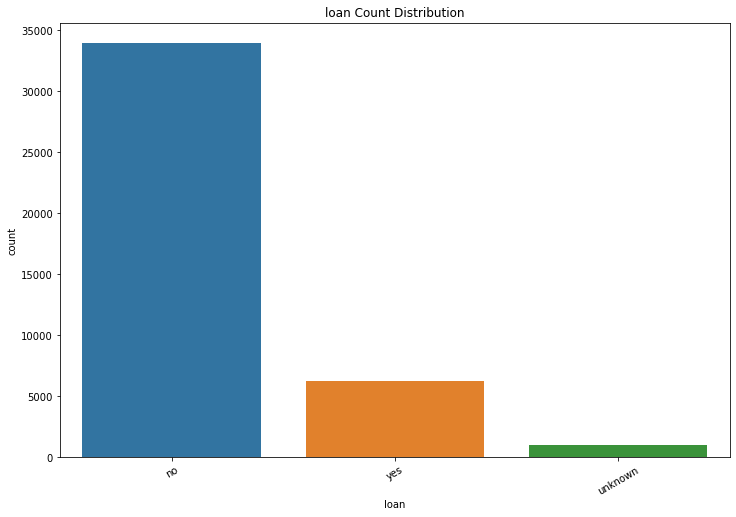

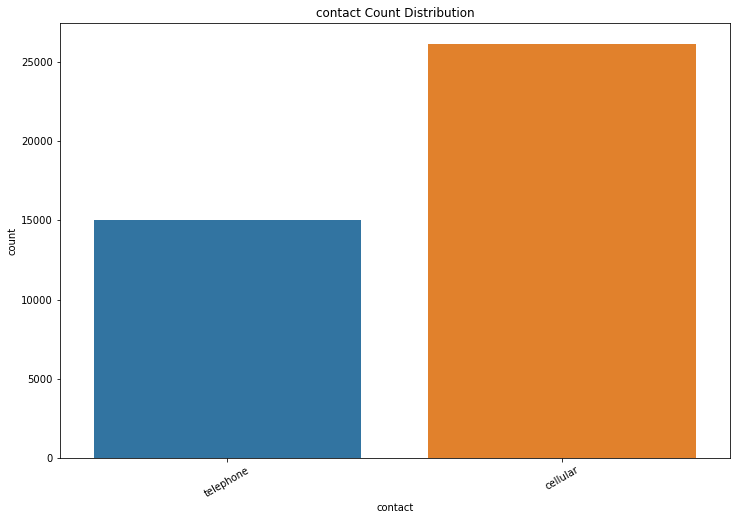

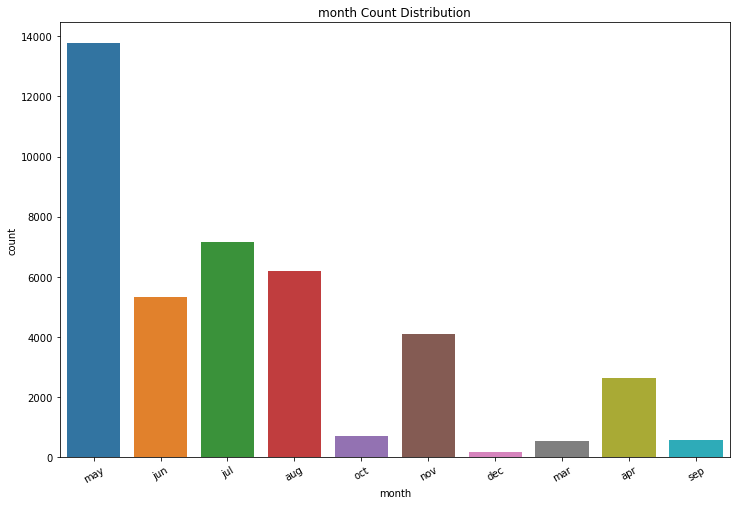

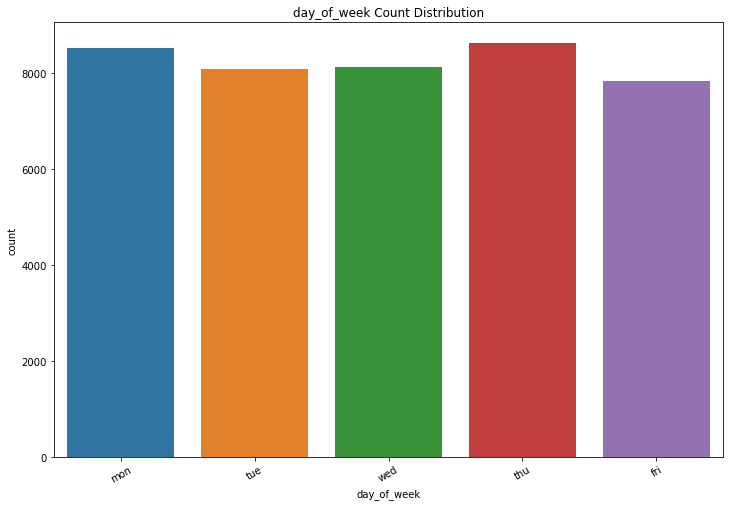

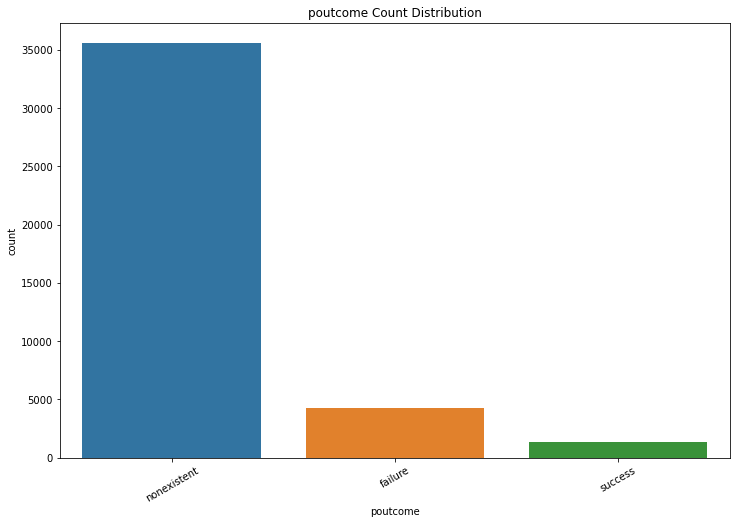

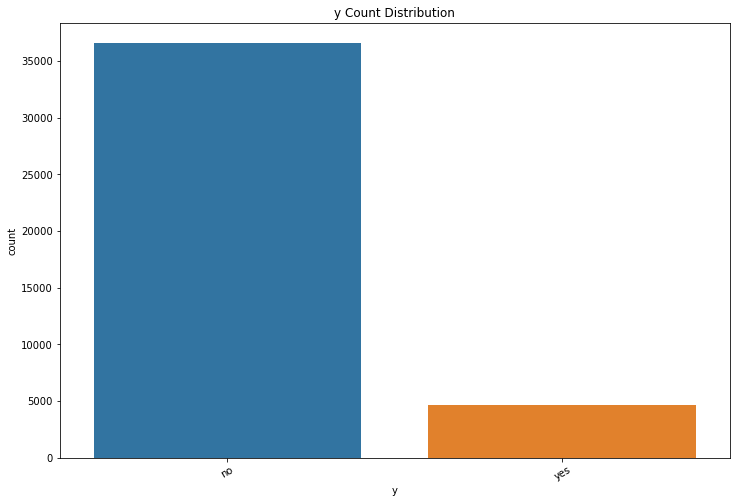

In [11]:
for i in range(0, len(categorical)):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    sns.countplot(x = categorical[i], data = df)
    
    ax.set_title('{} Count Distribution'.format(categorical[i]))
    plt.xticks(rotation=30)

After being visualized, now it's clearer to see which group dominated each features.

Up next, the categorical data should be encoded so that it can be compared to numerical data.

In [12]:
category_encoder = LabelEncoder()

In [13]:
for i in range(0, len(categorical)):
    df[categorical[i]] = category_encoder.fit_transform(df[categorical[i]])

In [14]:
pd.set_option('max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


To see the correlation between each features, let's visualize using heatmap.

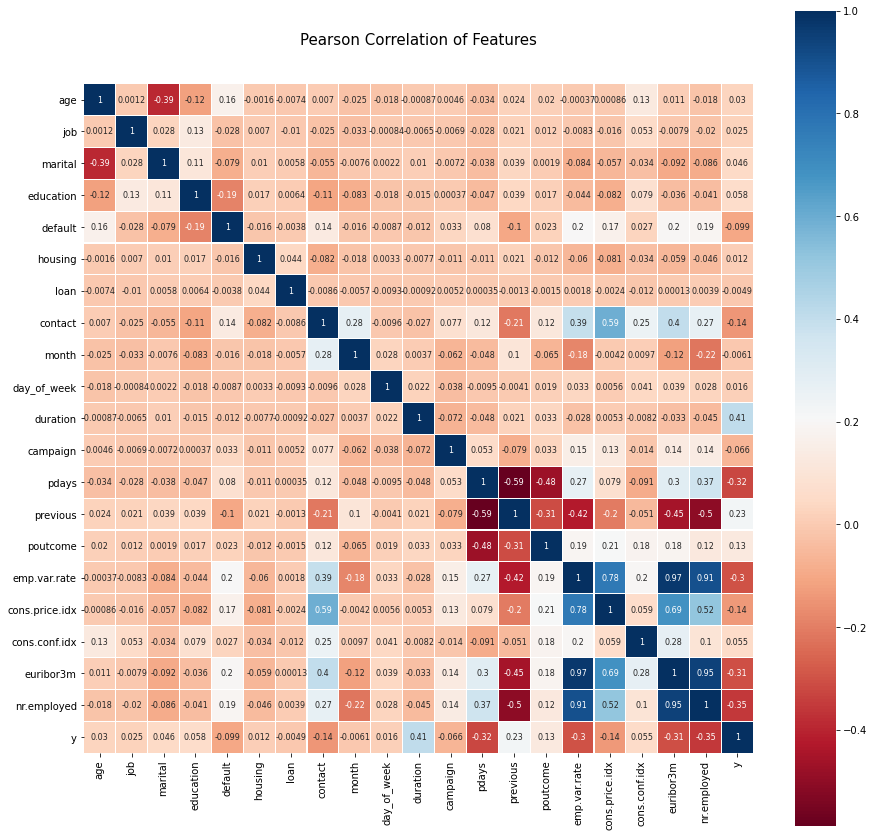

In [15]:
heatmapdata = df

colormap = plt.cm.RdBu
plt.figure(figsize=(15, 15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmapdata.astype(float).corr(), 
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True, 
            annot_kws={'size':8})
del heatmapdata

The heatmap shows correlation between features through numbers and colors. High correlation is represented by the blue shades (the darker the color shows higher correlation) and high number written in the box. Vice versa, low correlation is represented by the red shades and low number.

Up next, before splitting the data, we should separate the target feature and assign it into `y` variable. Thus, we need to drop the target from `x` variable.

In [16]:
# drop target from x dataset, so it's just contain attribute values
x = df.drop('y', 1)

# y variable contain y feature
y = df.y

In [17]:
# Let's check if the the target has been dropped from x or not
x.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [18]:
# Convert categorical variable into indicator variable
x = pd.get_dummies(x)

# Let's check once more if it has been converted or not
x.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


Now that x has been properly converted, let's check the target features.

In [19]:
# Check the target features
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [20]:
# Split the data into 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=13)

In [21]:
# Let's check the dimension to ensure that the data has been properly splitted
print("x_train shape is: ", x_train.shape)
print("x_test shape is: ", x_test.shape)

x_train shape is:  (28831, 20)
x_test shape is:  (12357, 20)


## Logistic Regression

In [22]:
# Import Logistic Regression module here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create model using liblinear solver
LR = LogisticRegression(solver='liblinear')

# Set training data
LR.fit(x_train, y_train)

# Do a test to predict
predict_LR = LR.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_LR = accuracy_score(y_test, predict_LR)
print("Model's accuracy: ", accuracy_LR,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_LR),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_LR))

Model's accuracy:  0.9079064497855467 

Confusion Matrix: 
 [[10665   312]
 [  826   554]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10977
           1       0.64      0.40      0.49      1380

    accuracy                           0.91     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



**Inference:**
- The accuracy score is 90,79%
- 11219 (10665+554) data is predicted true and 1138 (826+312) data is predicted false
- 0 class has more accuracy than 1 class

## K-Nearest Neighbors

In [23]:
# Import K-Nearest Neighbors module here
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
KNN = KNeighborsClassifier()

# Set training data
KNN.fit(x_train, y_train)

# Do a test to predict
predict_KNN = KNN.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_KNN = accuracy_score(y_test, predict_KNN)
print("Model's accuracy: ", accuracy_KNN,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_KNN),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_KNN))

Model's accuracy:  0.907016266084001 

Confusion Matrix: 
 [[10511   466]
 [  683   697]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10977
           1       0.60      0.51      0.55      1380

    accuracy                           0.91     12357
   macro avg       0.77      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357



**Inference:**
- The accuracy score is 90.70%
- 11208 (10511+697) data is predicted true and 1149 (683+466) data is predicted false

## Support Vector Machine

In [24]:
# Import Support Vector Machine module here
from sklearn import svm

# Create model
model_SVM = svm.SVC()

# Set training data
model_SVM.fit(x_train, y_train)

# Do a test to predict
predict_SVM = model_SVM.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_SVM = accuracy_score(y_test, predict_SVM)
print("Model's accuracy: ", accuracy_SVM,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_SVM),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_SVM))

Model's accuracy:  0.899166464352189 

Confusion Matrix: 
 [[10781   196]
 [ 1050   330]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10977
           1       0.63      0.24      0.35      1380

    accuracy                           0.90     12357
   macro avg       0.77      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



**Inference:**
- The accuracy score is 89.91%
- 11111 (10781+330) data is predicted true and 1246 (1050+196) data is predicted false

## Decision Tree

In [25]:
# Import Decision Tree module here
from sklearn.tree import DecisionTreeClassifier

# Create model
DT = DecisionTreeClassifier()

# Set training data
DT.fit(x_train, y_train)

# Do a test to predict
predict_DT = DT.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_DT = accuracy_score(y_test, predict_DT)
print("Model's accuracy: ", accuracy_DT,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_DT),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_DT))

Model's accuracy:  0.8879177793962936 

Confusion Matrix: 
 [[10245   732]
 [  653   727]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     10977
           1       0.50      0.53      0.51      1380

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



**Inference:**
- The accuracy score is 88.79%
- 10972 (10245+727) data is predicted true and 1385 (653+732) data is predicted false

## Random Forest

In [26]:
# Import Random Forest module here
from sklearn.ensemble import RandomForestClassifier

# Create model
RF = RandomForestClassifier()

# Set training data
RF.fit(x_train, y_train)

# Do a test to predict
predict_RF = RF.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_RF = accuracy_score(y_test, predict_RF)
print("Model's accuracy: ", accuracy_RF,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_RF),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_RF))

Model's accuracy:  0.9142995872784656 

Confusion Matrix: 
 [[10583   394]
 [  665   715]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10977
           1       0.64      0.52      0.57      1380

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



**Inference:**
- The accuracy score is 91,43%
- 11298 (10583+715) data is predicted true and 1059 (665+394) data is predicted false

## Naive Bayes

In [27]:
# Import Naive Bayes module here
from sklearn.naive_bayes import GaussianNB

# Create model
NB = GaussianNB()

# Set training data
NB.fit(x_train, y_train)

# Do a test to predict
predict_NB = NB.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_NB = accuracy_score(y_test, predict_NB)
print("Model's accuracy: ", accuracy_NB,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_NB),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_NB))

Model's accuracy:  0.8434895201100591 

Confusion Matrix: 
 [[9587 1390]
 [ 544  836]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91     10977
           1       0.38      0.61      0.46      1380

    accuracy                           0.84     12357
   macro avg       0.66      0.74      0.69     12357
weighted avg       0.88      0.84      0.86     12357



**Inference:**
- The accuracy score is 84.34%
- 10423 (9587+836) data is predicted true and 1934 (544+1390) data is predicted false

## Summary

In [28]:
print('Accuracy of Logistic Regression: ', accuracy_LR)
print('Accuracy of K-Nearest Neighbors: ', accuracy_KNN)
print('Accuracy of Support Vector Machine: ', accuracy_SVM)
print('Accuracy of Decision Tree: ', accuracy_DT)
print('Accuracy of Random Forest: ', accuracy_RF)
print('Accuracy of Naive Bayes: ', accuracy_NB)

Accuracy of Logistic Regression:  0.9079064497855467
Accuracy of K-Nearest Neighbors:  0.907016266084001
Accuracy of Support Vector Machine:  0.899166464352189
Accuracy of Decision Tree:  0.8879177793962936
Accuracy of Random Forest:  0.9142995872784656
Accuracy of Naive Bayes:  0.8434895201100591


After trying various classification methods, my final decision (to predict whether the client would subscribe to term deposit or not) would go to `Random Forest` since it has the highest accuracy of all and based on the confusion matrix, it can correctly predict up to 11298 data from 12357 data.